# グラフにフィッティングして臨界長を求める

**適合関数**：$$\frac{1}{2}\left(1+\tanh\left(\frac{x-L_c}{\sigma}\right)\right)$$
微分は、
$$\frac{1}{2\sigma}\text{sech}^2\left(\frac{x-L_c}{\sigma}\right)$$

除外したデータ(2サンプル)
- 1203 composite4
- 細胞破損しているもの

方針：
- 軸索指数はそのままは使わない。使うにはあまりにも分布が広がっているし、フィッティングするには上限をどこに設定すればいいか問題が起きるから、使い勝手が悪い。
- 軸索指数を二値化したものを使うことにする。これは見た目と反しないことがわかっているし、上限設定問題も解消されている。
- 使う関数はtanhとする。他の候補としてはsigmoidがあるが、これは関数型があまりきれいでない（特に微分したとき）し、同じく臨界長を求めている論文では、tanhを使っている。
- **最小二乗法**でフィッティングしていく

### 準備

In [1]:
import numpy as np
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('輝度解析まとめ_フィッティング用.csv')
df.sort_values(by='length', inplace=True)
pd.set_option('display.max_rows', None)

In [3]:
df

,length,polarization index,polarized
44,17,0.74,0
45,19,0.86,0
48,19,0.44,0
62,25,0.09,0
46,38,0.96,0
49,38,0.32,0
28,41,1.51,1
17,41,0.63,0
13,45,1.79,1
37,45,1.49,1


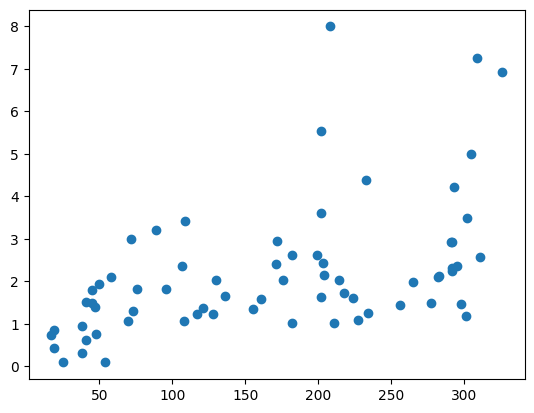

In [6]:
plt.scatter(df['length'], df['polarization index'])

In [18]:
X_data = np.array(df['length'])
y_data = np.array(df['polarized'])

In [64]:
# フィッティング関数（累積分布）
def func1(X, Lc, sigma):
    return 0.5*(np.tanh((X-Lc)/sigma)+1)

# フィッティング関数の導関数（確立密度関数）
def func2(X, Lc, sigma):
    return (1/(2*sigma) )*(np.cosh((X-Lc)/sigma))**(-2)

### 初期値をいろいろ指定してみるフィッティングしてみると、どれも同じ最適値を示す

std of Lc:0.00031296767647495324
std of sigma:0.000858133632107739


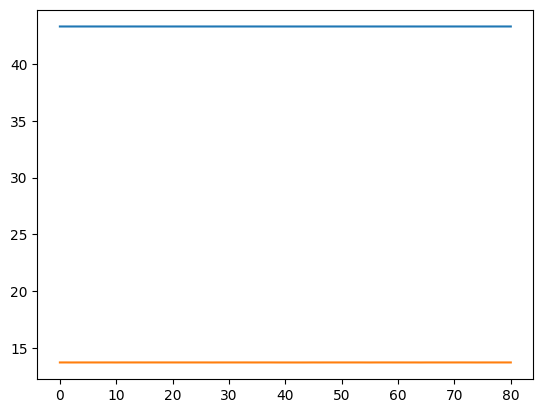

In [53]:
popts = []
for i in range(10, 100, 10):
    for j in range(10, 100, 10):
        popt, pcov = curve_fit(func1, X_data, y_data, p0=[i,j]) # poptは最適推定値、pcovは共分散
        popts.append(popt)
popts = np.array(popts)

print(f'std of Lc:{np.std(popts[:,0])}\nstd of sigma:{np.std(popts[:,1])}')
plt.plot(popts)

In [54]:
print('臨界長の幅：{:.5f}〜{:.5f}、広がりの幅：{:.5f}〜{:.5f}'.format(popts[:,0].min(),popts[:,0].max(),popts[:,1].min(),popts[:,1].max()))

臨界長の幅：43.32743〜43.32868、広がりの幅：13.70450〜13.70812


初期値依存性はないことが確認された。ただし、デフォルトの初期値(1,1)から始めると局所的最小値にハマってしまう。おそらく今回扱うスケールに対してσが勾配消失

In [12]:
Lc=popts[30,:][0]
sigma=popts[30,:][1]
print(f'Lc={Lc}, sigma={sigma}')

Lc=43.32817216072029, sigma=13.707101692086487


を採用することにする

ちなみに、ことのときのグラフは

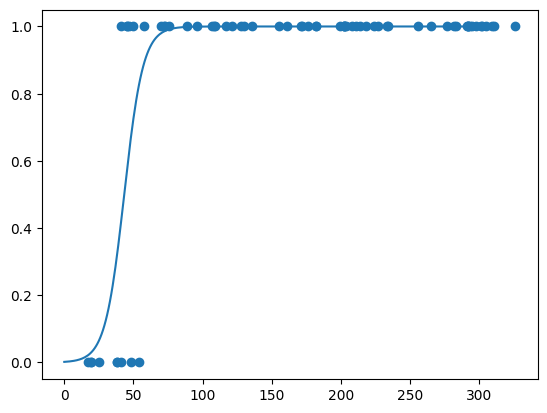

In [13]:
x_axis = np.arange(0,300, 1)
plt.scatter(X_data, y_data)
plt.plot(x_axis, func1(x_axis, Lc, sigma))

### テイルヘビー（臨界長以後のデータが多い）ので、長い方のデータを除いて適合してみても、ほぼ同じ最適値を示す

In [ ]:
X_data, X_data.shape, X_data[20]

(array([ 17,  19,  19,  25,  38,  38,  41,  41,  45,  45,  47,  48,  50,
         54,  58,  70,  72,  73,  76,  89,  96, 107, 108, 109, 117, 121,
        128, 130, 136, 155, 161, 171, 172, 176, 182, 182, 199, 202, 202,
        202, 203, 204, 208, 211, 214, 218, 224, 227, 233, 234, 256, 265,
        277, 282, 283, 291, 292, 292, 292, 293, 295, 298, 301, 302, 305,
        309, 311, 326]),
 (68,),
 96)

20番目に短い突起は96μmと臨界長を十分に超えているので、だいたい 20以降のデータを除いたり含めたりしてみて臨界長が変わるか試しているといいだろう。

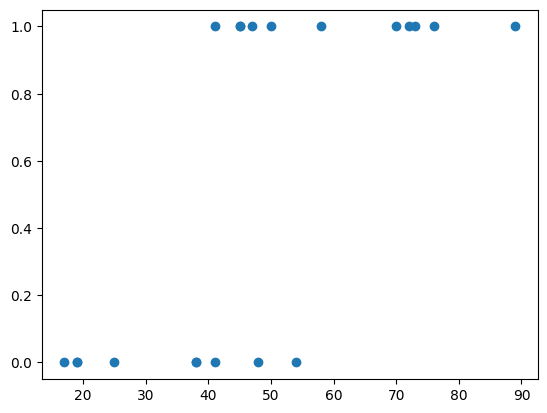

In [11]:
# 一番範囲が短いものではこんな感じ
plt.scatter(X_data[:20], y_data[:20])

std of Lc:1.635146379324434e-06
std of sigma:1.4460130753784902e-05


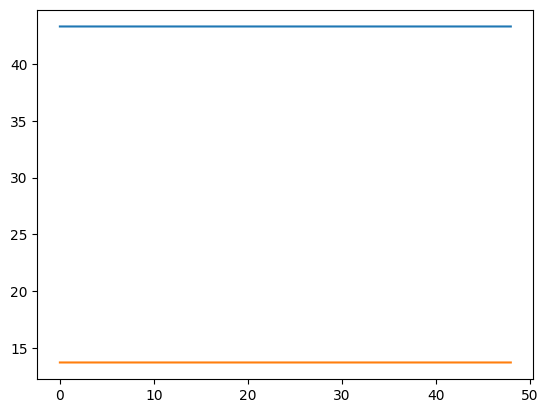

In [51]:
popts = []
for i in range(20, 69):
    X_data2 = np.array(df['length'])[:i]
    y_data2 = np.array(df['polarized'])[:i]
    popt, pcov = curve_fit(func1, X_data2, y_data2, p0=[50,20]) # poptは最適推定値、pcovは共分散
    popts.append(popt)
popts = np.array(popts)

print(f'std of Lc:{np.std(popts[:,0])}\nstd of sigma:{np.std(popts[:,1])}')
plt.plot(popts)
plt.show()

In [52]:
print('臨界長の幅：{:.5f}〜{:.5f}、広がりの幅：{:.5f}〜{:.5f}'.format(popts[:,0].min(),popts[:,0].max(),popts[:,1].min(),popts[:,1].max()))

臨界長の幅：43.32799〜43.32800、広がりの幅：13.70762〜13.70773


#### おまけ：散布図ではなくてヒストグラムに対してフィッティングは良くない。棒の幅によってパラメータの最適値が変わってきてしまうから。

[43.32798843 13.70762476] [[ 3.47800242 -1.27419979]
 [-1.27419979 23.02693595]]


/tmp/ipykernel_10770/3344551432.py:11: RuntimeWarning: invalid value encountered in divide
  hist = rate_of_pol/n_instances


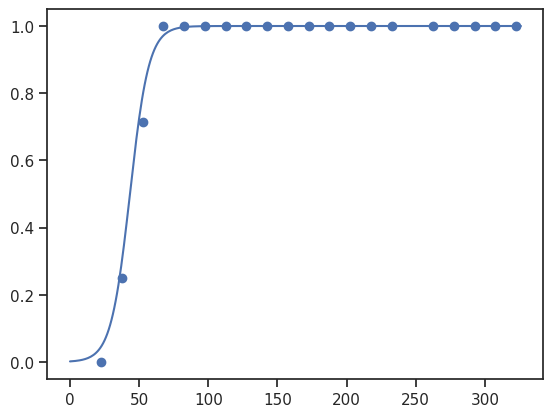

In [329]:
length_bins = 15
n_bins = 326//length_bins + 1
n_instances = np.zeros(n_bins)
rate_of_pol = np.zeros(n_bins)

for i in range(len(X_data)):
    x, y = X_data[i], y_data[i]
    n = int(x/length_bins)
    n_instances[n] += 1
    rate_of_pol[n] += y
hist = rate_of_pol/n_instances    

x = [length_bins*(i+0.5) for i in range(n_bins)]

popt, pcov = curve_fit(func1, X_data, y_data, p0=[50,20]) # poptは最適推定値、pcovは共分散
print(popt, pcov)

x_axis = np.arange(0,327, 1)
plt.scatter(x, hist)
plt.plot(x_axis, func1(x_axis, popt[0], popt[1]))

In [ ]:
いろいろな区画の大きさに調整するとパラメータがどう変わるのか見ておく

std of Lc:27.921239292643158
std of sigma:5.22819559078414


/tmp/ipykernel_10770/1205447811.py:12: RuntimeWarning: invalid value encountered in divide
  hist = rate_of_pol/n_instances


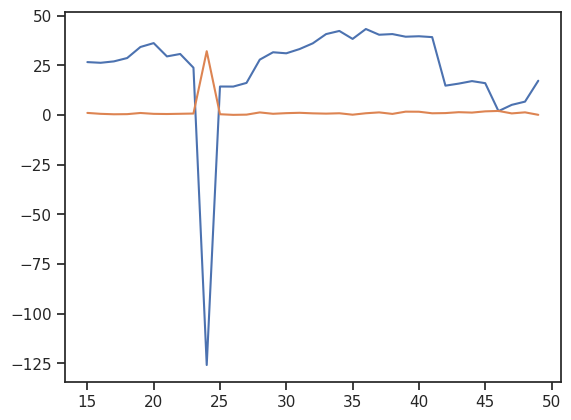

In [328]:
popts = []
for length_bins in range(15,50): 
    n_bins = 326//length_bins + 1
    n_instances = np.zeros(n_bins)
    rate_of_pol = np.zeros(n_bins)

    for i in range(len(X_data)):
        x, y = X_data[i], y_data[i]
        n = int(x/length_bins)
        n_instances[n] += 1
        rate_of_pol[n] += y
    hist = rate_of_pol/n_instances    
    x = [length_bins*(i+0.5) for i in range(n_bins)]
    
    popt, pcov = curve_fit(func1, x, rate_of_pol, p0=[50,20]) # poptは最適推定値、pcovは共分散
    popts.append(popt)
popts = np.array(popts)

print(f'std of Lc:{np.std(popts[:,0])}\nstd of sigma:{np.std(popts[:,1])}')
plt.plot(range(15,50),popts)
plt.show()

割とぐちゃぐちゃになるので、ヒストグラムでフィッティングを行うのは懸命ではない。

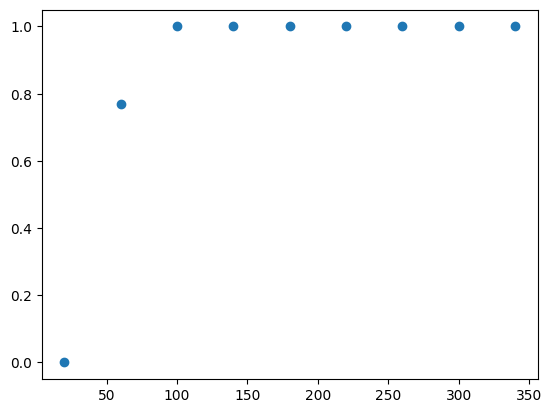

In [85]:
length_bins = 40
n_bins = 326//length_bins + 1
n_instances = np.zeros(n_bins)
rate_of_pol = np.zeros(n_bins)

for i in range(len(X_data)):
    x, y = X_data[i], y_data[i]
    n = int(x/length_bins)
    n_instances[n] += 1
    rate_of_pol[n] += y
hist = rate_of_pol/n_instances    

x = [length_bins*(i+0.5) for i in range(n_bins)]
plt.scatter(x, hist)

### 結論
初期値を変えても、範囲を変えても、パラメータ（臨界長$L_c$、広がり$\sigma$）の最適値は変らないので、やはり$$\cases{L_c=43.3\;(\mu m)\\\sigma=13.7\;(\mu m)}$$を採用する。

### しきい値（有効数字3桁で分化率が100%になる長さ）は 95.4μm

In [18]:
import sympy as sym
Lc=43.3
sigma=13.7

sym.init_printing()
l = sym.Symbol('l', real=True)
f = sym.Eq(0.5*(sym.tanh((l-Lc)/sigma) +1),0.9995)
sym.solvers.solve(f,l)

In [63]:
print('ちなみに 96μmでの分化率は{}'.format(func1(196, Lc=43.3, sigma=13.7)*100))

ちなみに 96μmでの分化率は99.99999997916852


### Figureの作成

`errorbar`はいくつかオプションがあるが`standard error`を使った。（https://seaborn.pydata.org/tutorial/error_bars.html）

In [14]:
import seaborn as sns
sns.set_theme(style="ticks")

In [16]:
bin_edges = list(range(0,326+20,20))

df['length_range'] = pd.cut(df['length'], bin_edges)

counts = df[['length_range']].value_counts().reset_index().sort_values(by='length_range',ascending=True)[0]
counts = list(counts)

averages = df[['length_range','polarized']].groupby('length_range').mean()

averages = list(averages['polarized'])

In [17]:
length_bins = 20
n_bins = 326//length_bins + 1
n_instances = np.zeros(n_bins)
rate_of_pol = np.zeros(n_bins)

for i in range(len(X_data)):
    x, y = X_data[i], y_data[i]
    n = int(x/length_bins)
    n_instances[n] += 1
    rate_of_pol[n] += y
hist = rate_of_pol/n_instances    

x = [length_bins*(i+0.5) for i in range(n_bins)]

popt, pcov = curve_fit(func1, X_data, y_data, p0=[50,20]) # poptは最適推定値、pcovは共分散
print(popt, pcov)

[43.32798843 13.70762476] [[ 3.47800242 -1.27419979]
 [-1.27419979 23.02693595]]


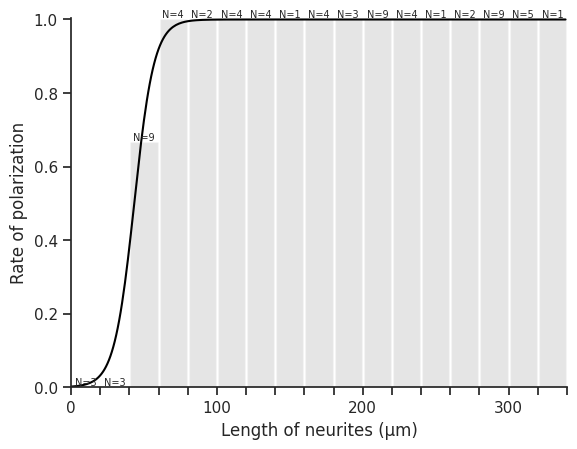

In [ ]:
# barplot
ax = sns.barplot(x='length_range', y='polarized', data=df, color='grey', alpha=0.2, width=0.93, errorbar=None)

# ticks
custom_ticks = bin_edges
shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
ax.set_xticks(shifted_ticks)
custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
ax.set_xticklabels(custom_labels)

# Add counts above the bars
for i, count in enumerate(counts):
    ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

# fit graph
x_axis = np.arange(0,340, 1)
sns.lineplot(x=(x_axis/20)-0.5, y=func1(x_axis, popt[0], popt[1]), color='black')

# Add labels and title
plt.xlabel('Length of neurites (μm)')
plt.ylabel('Rate of polarization')

# Remove the spines (outline)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim([-0.5, 16.5])
plt.ylim([0.0, 1.005])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

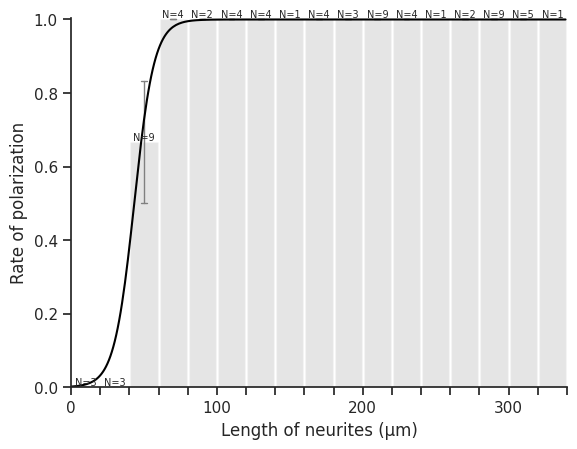

In [29]:
# barplot
ax = sns.barplot(x='length_range', y='polarized', data=df, color='grey', alpha=0.2, width=0.93, errorbar='se', 
                errcolor='grey', errwidth=1, capsize=0.2)

# ticks
custom_ticks = bin_edges
shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
ax.set_xticks(shifted_ticks)
custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
ax.set_xticklabels(custom_labels)

# Add counts above the bars
for i, count in enumerate(counts):
    ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

# fit graph
x_axis = np.arange(0,340, 1)
sns.lineplot(x=(x_axis/20)-0.5, y=func1(x_axis, popt[0], popt[1]), color='black')

# Add labels and title
plt.xlabel('Length of neurites (μm)')
plt.ylabel('Rate of polarization')

# Remove the spines (outline)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim([-0.5, 16.5])
plt.ylim([0.0, 1.005])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

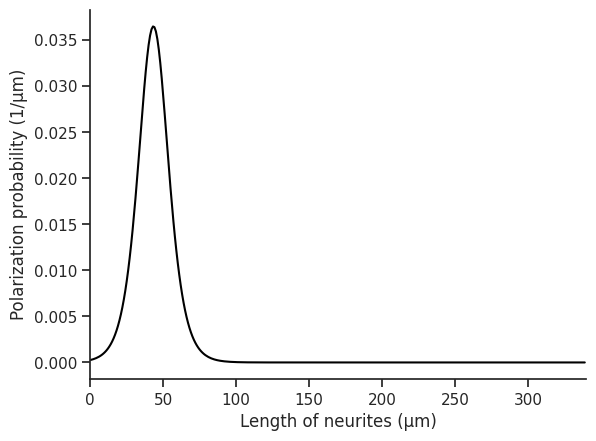

In [315]:
ax = sns.lineplot(x=x_axis, y=func2(x_axis, 43.3, 13.7), color='black')

# Add labels and title
plt.xlabel('Length of neurites (μm)')
plt.ylabel('Polarization probability (1/μm)')

# Remove the spines (outline)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim([0, 340])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

<AxesSubplot: >

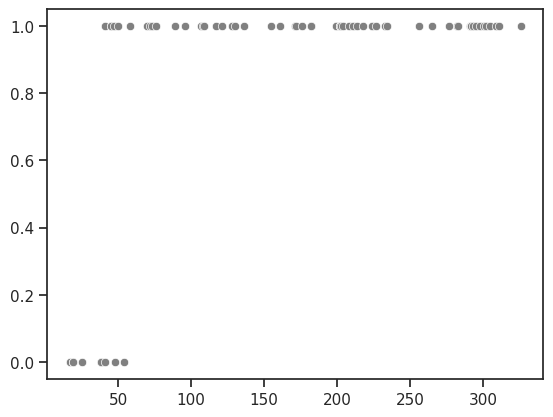

In [309]:
sns.scatterplot(x=X_data, y=y_data, color='grey', alpha=1)

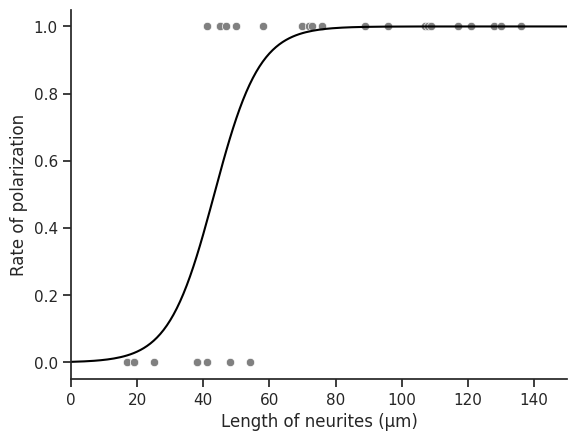

In [324]:
# barplot
ax = sns.scatterplot(x=X_data, y=y_data, color='grey', alpha=1)

# # ticks
# custom_ticks = bin_edges
# shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
# ax.set_xticks(shifted_ticks)
# custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
# ax.set_xticklabels(custom_labels)

# # Add counts above the bars
# for i, count in enumerate(counts):
#     ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

# fit graph
x_axis = np.arange(0,340, 1)
sns.lineplot(x=x_axis, y=func1(x_axis, 43.3, 13.7), color='black')

# Add labels and title
plt.xlabel('Length of neurites (μm)')
plt.ylabel('Rate of polarization')

# Remove the spines (outline)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim([0, 150])
# plt.ylim([0.0, 1.0])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

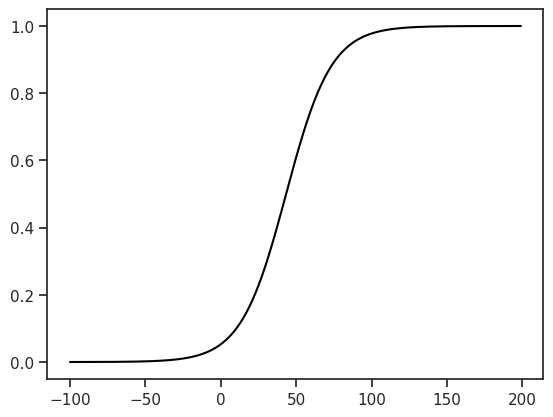

In [337]:
# barplot
# ax = sns.scatterplot(x=X_data, y=y_data, color='grey', alpha=1)

# # ticks
# custom_ticks = bin_edges
# shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
# ax.set_xticks(shifted_ticks)
# custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
# ax.set_xticklabels(custom_labels)

# # Add counts above the bars
# for i, count in enumerate(counts):
#     ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

# fit graph
x_axis = np.arange(-100,200, 1)
sns.lineplot(x=x_axis, y=func1(x_axis, 43.3, 30), color='black')

# # Add labels and title
# plt.xlabel('Length of neurites (μm)')
# plt.ylabel('Rate of polarization')

# # Remove the spines (outline)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.xlim([0, 150])
# # plt.ylim([0.0, 1.0])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

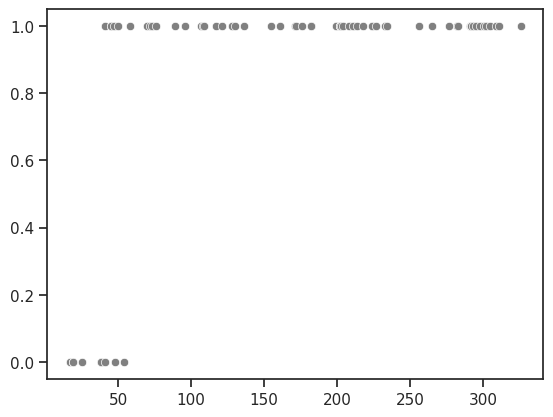

In [330]:
# barplot
ax = sns.scatterplot(x=X_data, y=y_data, color='grey', alpha=1)

# # ticks
# custom_ticks = bin_edges
# shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
# ax.set_xticks(shifted_ticks)
# custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
# ax.set_xticklabels(custom_labels)

# # Add counts above the bars
# for i, count in enumerate(counts):
#     ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

# # fit graph
# x_axis = np.arange(0,340, 1)
# sns.lineplot(x=x_axis, y=func1(x_axis, 43.3, 13.7), color='black')

# # Add labels and title
# plt.xlabel('Length of neurites (μm)')
# plt.ylabel('Rate of polarization')

# # Remove the spines (outline)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.xlim([0, 150])
# # plt.ylim([0.0, 1.0])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

# Hillの式によるフィッティング
**適合先の関数**：$$\frac{1}{1+\left(\frac{L_c}{L}\right)^{n}}$$
微分は$$\frac{n\left(\frac{L_c}{L}\right)^n}{L\left(1+\left(\frac{L_c}{L}\right)^{n}\right)^2}$$

### 準備

In [41]:
import numpy as np
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
df = pd.read_csv('輝度解析まとめ_フィッティング用.csv')
df.sort_values(by='length', inplace=True)
pd.set_option('display.max_rows', None)

In [43]:
df

,length,polarization index,polarized
44,17,0.74,0
45,19,0.86,0
48,19,0.44,0
62,25,0.09,0
46,38,0.96,0
49,38,0.32,0
28,41,1.51,1
17,41,0.63,0
13,45,1.79,1
37,45,1.49,1


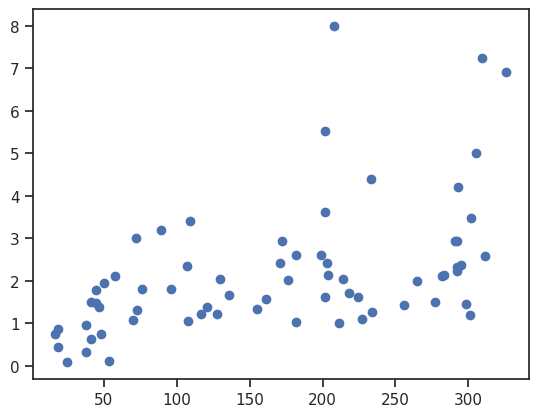

In [44]:
plt.scatter(df['length'], df['polarization index'])

In [45]:
X_data = np.array(df['length'])
y_data = np.array(df['polarized'])

In [80]:
# フィッティング関数（累積分布）
def func3(X, Lc, n):
    return (1+(Lc/X)**n)**(-1)

# フィッティング関数の導関数（確立密度）
def func4(X, Lc, n):
    return (n*((Lc/X)**n))/(X*((1+(Lc/X)**(n))**2))

### 初期値をいろいろ指定してみるフィッティングしてみると、どれも同じ最適値を示す

std of Lc:0.00014211926871452653
std of sigma:0.00022981579437290596


/tmp/ipykernel_5285/2905016190.py:3: RuntimeWarning: invalid value encountered in power
  return (1+(Lc/X)**n)**(-1)


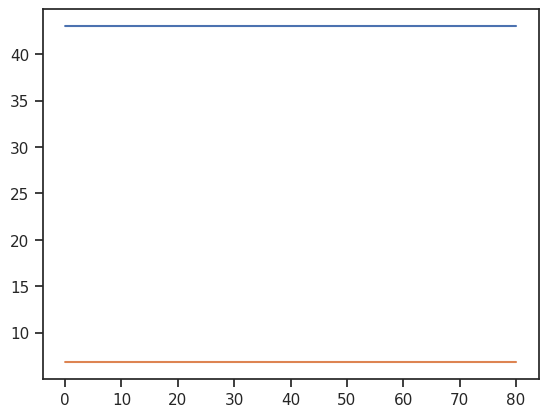

In [58]:
popts = []
for i in range(10, 100, 10):
    for j in range(1, 10, 1):
        popt, pcov = curve_fit(func3, X_data, y_data, p0=[i,j]) # poptは最適推定値、pcovは共分散
        popts.append(popt)
popts = np.array(popts)

print(f'std of Lc:{np.std(popts[:,0])}\nstd of sigma:{np.std(popts[:,1])}')
plt.plot(popts)

In [63]:
print('臨界長Lcの幅：{:.5f}〜{:.5f}、nの幅：{:.5f}〜{:.5f}'.format(popts[:,0].min(),popts[:,0].max(),popts[:,1].min(),popts[:,1].max()))

臨界長Lcの幅：43.02173〜43.02271、nの幅：6.84161〜6.84311


初期値依存性はないことが確認された。

In [64]:
Lc=popts[30,:][0]
n=popts[30,:][1]
print(f'Lc={Lc}, n={n}')

Lc=43.02238734677855, n=6.842248821015306


を採用することにする

ちなみに、ことのときのグラフは

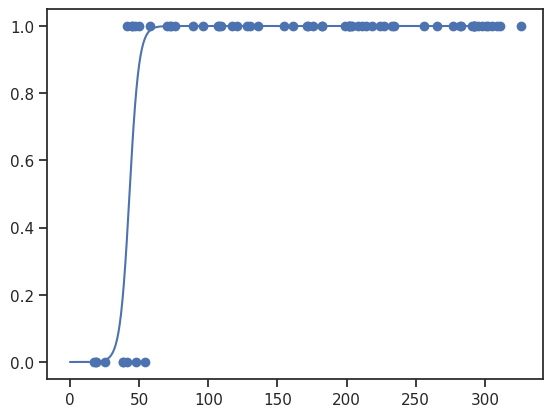

In [65]:
x_axis = np.arange(0,300, 1)
plt.scatter(X_data, y_data)
plt.plot(x_axis, func1(x_axis, Lc, n))

### テイルヘビー（臨界長以後のデータが多い）ので、長い方のデータを除いて適合してみても、ほぼ同じ最適値を示す

In [ ]:
X_data, X_data.shape, X_data[20]

(array([ 17,  19,  19,  25,  38,  38,  41,  41,  45,  45,  47,  48,  50,
         54,  58,  70,  72,  73,  76,  89,  96, 107, 108, 109, 117, 121,
        128, 130, 136, 155, 161, 171, 172, 176, 182, 182, 199, 202, 202,
        202, 203, 204, 208, 211, 214, 218, 224, 227, 233, 234, 256, 265,
        277, 282, 283, 291, 292, 292, 292, 293, 295, 298, 301, 302, 305,
        309, 311, 326]),
 (68,),
 96)

20番目に短い突起は96μmと臨界長を十分に超えているので、だいたい 20以降のデータを除いたり含めたりしてみて臨界長が変わるか試しているといいだろう。

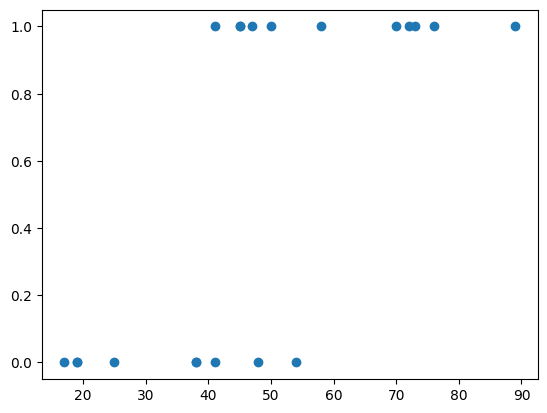

In [11]:
# 一番範囲が短いものではこんな感じ
plt.scatter(X_data[:20], y_data[:20])

std of Lc:0.00011008727802233995
std of sigma:0.0007963982116249215


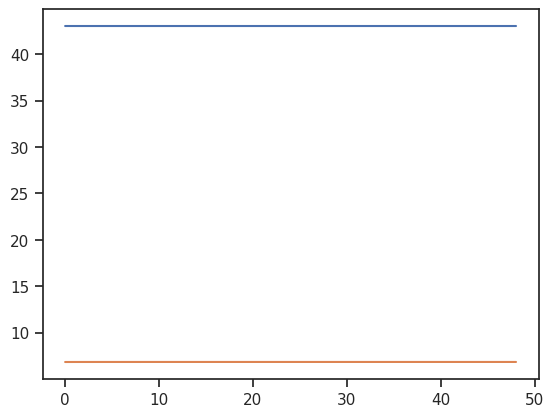

In [66]:
popts = []
for i in range(20, 69):
    X_data2 = np.array(df['length'])[:i]
    y_data2 = np.array(df['polarized'])[:i]
    popt, pcov = curve_fit(func3, X_data2, y_data2, p0=[50,6]) # poptは最適推定値、pcovは共分散
    popts.append(popt)
popts = np.array(popts)

print(f'std of Lc:{np.std(popts[:,0])}\nstd of sigma:{np.std(popts[:,1])}')
plt.plot(popts)
plt.show()

In [67]:
print('臨界長Lcの幅：{:.5f}〜{:.5f}、nの幅：{:.5f}〜{:.5f}'.format(popts[:,0].min(),popts[:,0].max(),popts[:,1].min(),popts[:,1].max()))

臨界長Lcの幅：43.02232〜43.02301、nの幅：6.83715〜6.84205


[43.32798843 13.70762476] [[ 3.47800242 -1.27419979]
 [-1.27419979 23.02693595]]


/tmp/ipykernel_10770/3344551432.py:11: RuntimeWarning: invalid value encountered in divide
  hist = rate_of_pol/n_instances


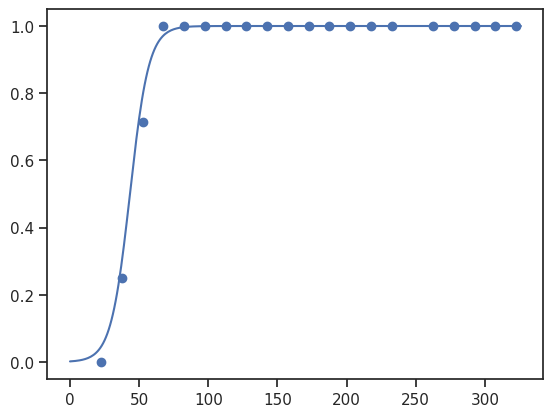

In [329]:
length_bins = 15
n_bins = 326//length_bins + 1
n_instances = np.zeros(n_bins)
rate_of_pol = np.zeros(n_bins)

for i in range(len(X_data)):
    x, y = X_data[i], y_data[i]
    n = int(x/length_bins)
    n_instances[n] += 1
    rate_of_pol[n] += y
hist = rate_of_pol/n_instances    

x = [length_bins*(i+0.5) for i in range(n_bins)]

popt, pcov = curve_fit(func1, X_data, y_data, p0=[50,20]) # poptは最適推定値、pcovは共分散
print(popt, pcov)

x_axis = np.arange(0,327, 1)
plt.scatter(x, hist)
plt.plot(x_axis, func1(x_axis, popt[0], popt[1]))

In [ ]:
いろいろな区画の大きさに調整するとパラメータがどう変わるのか見ておく

std of Lc:27.921239292643158
std of sigma:5.22819559078414


/tmp/ipykernel_10770/1205447811.py:12: RuntimeWarning: invalid value encountered in divide
  hist = rate_of_pol/n_instances


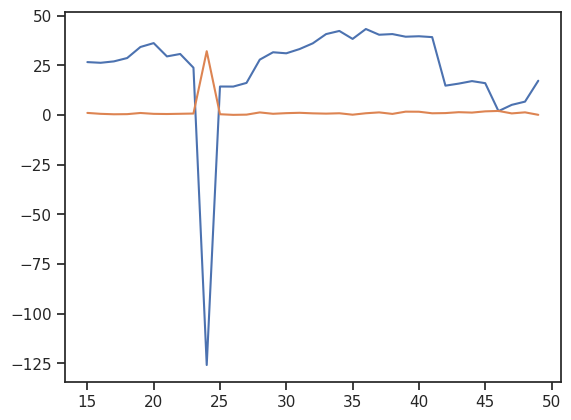

In [328]:
popts = []
for length_bins in range(15,50): 
    n_bins = 326//length_bins + 1
    n_instances = np.zeros(n_bins)
    rate_of_pol = np.zeros(n_bins)

    for i in range(len(X_data)):
        x, y = X_data[i], y_data[i]
        n = int(x/length_bins)
        n_instances[n] += 1
        rate_of_pol[n] += y
    hist = rate_of_pol/n_instances    
    x = [length_bins*(i+0.5) for i in range(n_bins)]
    
    popt, pcov = curve_fit(func1, x, rate_of_pol, p0=[50,20]) # poptは最適推定値、pcovは共分散
    popts.append(popt)
popts = np.array(popts)

print(f'std of Lc:{np.std(popts[:,0])}\nstd of sigma:{np.std(popts[:,1])}')
plt.plot(range(15,50),popts)
plt.show()

割とぐちゃぐちゃになるので、ヒストグラムでフィッティングを行うのは懸命ではない。

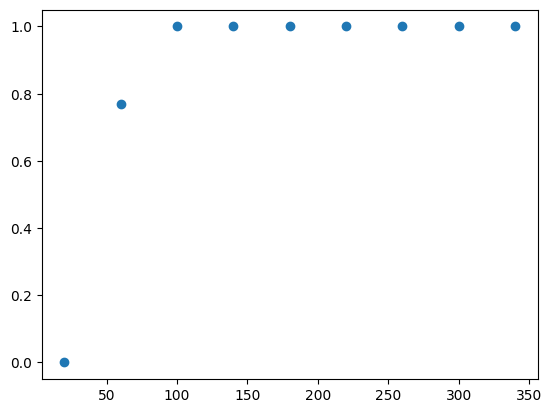

In [85]:
length_bins = 40
n_bins = 326//length_bins + 1
n_instances = np.zeros(n_bins)
rate_of_pol = np.zeros(n_bins)

for i in range(len(X_data)):
    x, y = X_data[i], y_data[i]
    n = int(x/length_bins)
    n_instances[n] += 1
    rate_of_pol[n] += y
hist = rate_of_pol/n_instances    

x = [length_bins*(i+0.5) for i in range(n_bins)]
plt.scatter(x, hist)

### 結論
初期値を変えても、範囲を変えても、パラメータ（臨界長$L_c$、広がり$\sigma$）の最適値は変らないので、やはり$$\cases{L_c=43.0\;(\mu m)\\\sigma=6.84\;(\mu m)}$$を採用する。

### しきい値（有効数字3桁で分化率が100%になる長さ）は 130.6μm

In [68]:
import sympy as sym
Lc=43.0
n=6.84

sym.init_printing()
l = sym.Symbol('l', real=True)
f = sym.Eq((1+(Lc/l)**n)**(-1),0.9995)
sym.solvers.solve(f,l, rational=False)

### Figureの作成

`errorbar`はいくつかオプションがあるが`standard error`を使った。（https://seaborn.pydata.org/tutorial/error_bars.html）

In [69]:
import seaborn as sns
sns.set_theme(style="ticks")

In [70]:
bin_edges = list(range(0,326+20,20))

df['length_range'] = pd.cut(df['length'], bin_edges)

counts = df[['length_range']].value_counts().reset_index().sort_values(by='length_range',ascending=True)[0]
counts = list(counts)

averages = df[['length_range','polarized']].groupby('length_range').mean()

averages = list(averages['polarized'])

In [71]:
length_bins = 20
n_bins = 326//length_bins + 1
n_instances = np.zeros(n_bins)
rate_of_pol = np.zeros(n_bins)

for i in range(len(X_data)):
    x, y = X_data[i], y_data[i]
    n = int(x/length_bins)
    n_instances[n] += 1
    rate_of_pol[n] += y
hist = rate_of_pol/n_instances    

x = [length_bins*(i+0.5) for i in range(n_bins)]

popt, pcov = curve_fit(func3, X_data, y_data, p0=[50,6]) # poptは最適推定値、pcovは共分散
print(popt, pcov)

[43.02232508  6.84205001] [[3.05671437 0.96104868]
 [0.96104868 5.7483678 ]]


/tmp/ipykernel_5285/2905016190.py:3: RuntimeWarning: divide by zero encountered in divide
  return (1+(Lc/X)**n)**(-1)


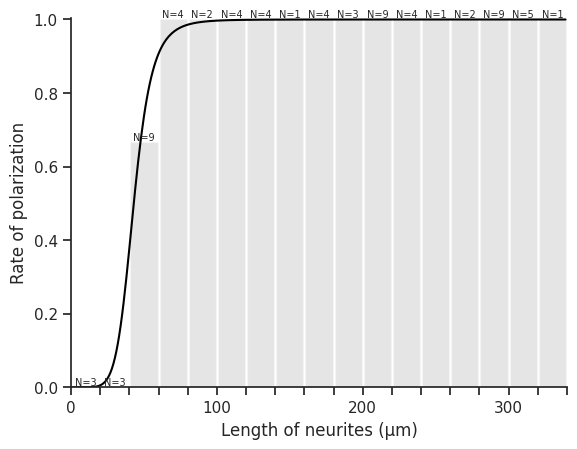

In [72]:
# barplot
ax = sns.barplot(x='length_range', y='polarized', data=df, color='grey', alpha=0.2, width=0.93, errorbar=None)

# ticks
custom_ticks = bin_edges
shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
ax.set_xticks(shifted_ticks)
custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
ax.set_xticklabels(custom_labels)

# Add counts above the bars
for i, count in enumerate(counts):
    ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

# fit graph
x_axis = np.arange(0,340, 1)
sns.lineplot(x=(x_axis/20)-0.5, y=func3(x_axis, popt[0], popt[1]), color='black')

# Add labels and title
plt.xlabel('Length of neurites (μm)')
plt.ylabel('Rate of polarization')

# Remove the spines (outline)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim([-0.5, 16.5])
plt.ylim([0.0, 1.005])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

/tmp/ipykernel_5285/2905016190.py:3: RuntimeWarning: divide by zero encountered in divide
  return (1+(Lc/X)**n)**(-1)


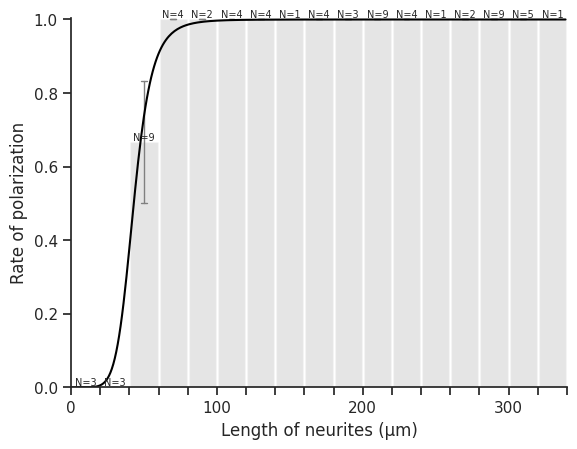

In [73]:
# barplot
ax = sns.barplot(x='length_range', y='polarized', data=df, color='grey', alpha=0.2, width=0.93, errorbar='se', 
                errcolor='grey', errwidth=1, capsize=0.2)

# ticks
custom_ticks = bin_edges
shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
ax.set_xticks(shifted_ticks)
custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
ax.set_xticklabels(custom_labels)

# Add counts above the bars
for i, count in enumerate(counts):
    ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

# fit graph
x_axis = np.arange(0,340, 1)
sns.lineplot(x=(x_axis/20)-0.5, y=func3(x_axis, popt[0], popt[1]), color='black')

# Add labels and title
plt.xlabel('Length of neurites (μm)')
plt.ylabel('Rate of polarization')

# Remove the spines (outline)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim([-0.5, 16.5])
plt.ylim([0.0, 1.005])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

/tmp/ipykernel_5285/1505329465.py:7: RuntimeWarning: divide by zero encountered in divide
  return (n*((Lc/X)**n))/(X*((1+(Lc/X)**(n))**2))
/tmp/ipykernel_5285/1505329465.py:7: RuntimeWarning: invalid value encountered in multiply
  return (n*((Lc/X)**n))/(X*((1+(Lc/X)**(n))**2))


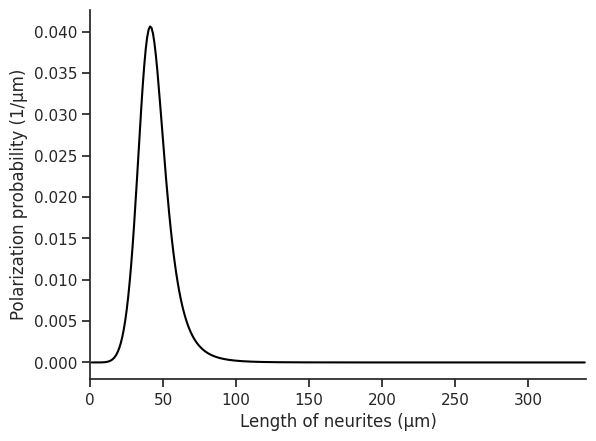

In [81]:
ax = sns.lineplot(x=x_axis, y=func4(x_axis, 43.0, 6.84), color='black')

# Add labels and title
plt.xlabel('Length of neurites (μm)')
plt.ylabel('Polarization probability (1/μm)')

# Remove the spines (outline)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim([0, 340])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

<AxesSubplot: >

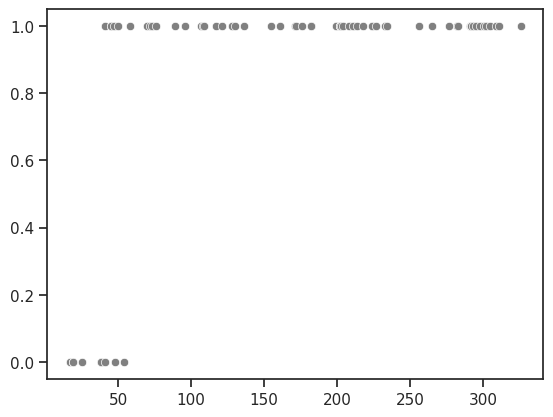

In [75]:
sns.scatterplot(x=X_data, y=y_data, color='grey', alpha=1)

/tmp/ipykernel_5285/2905016190.py:3: RuntimeWarning: divide by zero encountered in divide
  return (1+(Lc/X)**n)**(-1)


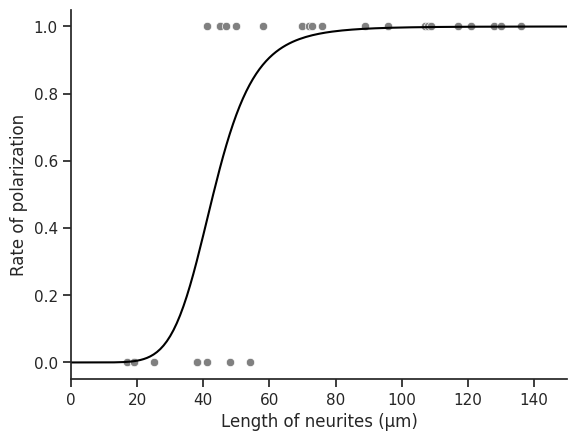

In [76]:
# barplot
ax = sns.scatterplot(x=X_data, y=y_data, color='grey', alpha=1)

# # ticks
# custom_ticks = bin_edges
# shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
# ax.set_xticks(shifted_ticks)
# custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
# ax.set_xticklabels(custom_labels)

# # Add counts above the bars
# for i, count in enumerate(counts):
#     ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

# fit graph
x_axis = np.arange(0,340, 1)
sns.lineplot(x=x_axis, y=func3(x_axis, 43.0, 6.84), color='black')

# Add labels and title
plt.xlabel('Length of neurites (μm)')
plt.ylabel('Rate of polarization')

# Remove the spines (outline)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim([0, 150])
# plt.ylim([0.0, 1.0])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

/tmp/ipykernel_5285/1505329465.py:3: RuntimeWarning: divide by zero encountered in divide
  return (1+(Lc/X)**n)**(-1)
/tmp/ipykernel_5285/1505329465.py:3: RuntimeWarning: invalid value encountered in power
  return (1+(Lc/X)**n)**(-1)


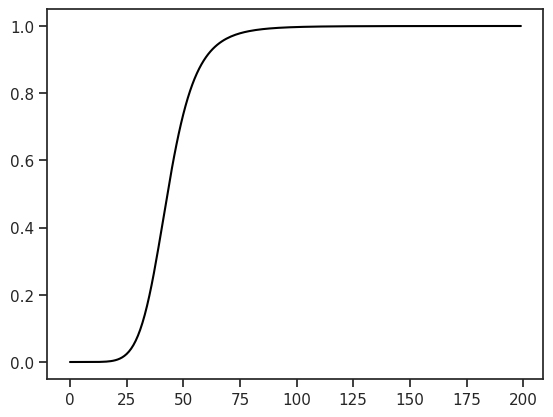

In [82]:
# barplot
# ax = sns.scatterplot(x=X_data, y=y_data, color='grey', alpha=1)

# # ticks
# custom_ticks = bin_edges
# shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
# ax.set_xticks(shifted_ticks)
# custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
# ax.set_xticklabels(custom_labels)

# # Add counts above the bars
# for i, count in enumerate(counts):
#     ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

# fit graph
x_axis = np.arange(-100,200, 1)
sns.lineplot(x=x_axis, y=func3(x_axis, 43.0, 6.84), color='black')

# # Add labels and title
# plt.xlabel('Length of neurites (μm)')
# plt.ylabel('Rate of polarization')

# # Remove the spines (outline)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.xlim([0, 150])
# # plt.ylim([0.0, 1.0])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

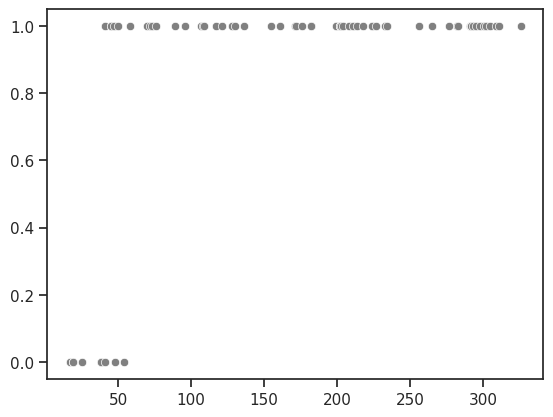

In [330]:
# barplot
ax = sns.scatterplot(x=X_data, y=y_data, color='grey', alpha=1)

# # ticks
# custom_ticks = bin_edges
# shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
# ax.set_xticks(shifted_ticks)
# custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
# ax.set_xticklabels(custom_labels)

# # Add counts above the bars
# for i, count in enumerate(counts):
#     ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

# # fit graph
# x_axis = np.arange(0,340, 1)
# sns.lineplot(x=x_axis, y=func1(x_axis, 43.3, 13.7), color='black')

# # Add labels and title
# plt.xlabel('Length of neurites (μm)')
# plt.ylabel('Rate of polarization')

# # Remove the spines (outline)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.xlim([0, 150])
# # plt.ylim([0.0, 1.0])

# Save the figure in high resolution
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()

# 軸索指標$f$の境界ラインを1.0にする理由
1. 境界ラインをさまざまに設定してみると、棒グラフが理想的な形状（突起が短いときに未分化、十分長いときは分化）を示すのは境界ラインが`0.86-1.02`のときであるが、その範囲では臨界長は`36-44`μm、しきい値は`95.4-148.9`μmの幅を持つ。
2. 境界ラインを`0.86-1.02`に据えることによって生じる変化を大きいと捉えるか小さいと捉えるかはさておき、とりあえず、**ある程度は違いが出ることを頭にいれつつ、切が良いし、意味もわかりやすい**ので、1.0を用いてグラフを描画することにする。

### 準備

In [ ]:
import numpy as np
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks")

In [ ]:
df = pd.read_csv('輝度解析まとめ_フィッティング用.csv')
df.drop(['polarized'], axis=1, inplace=True)
df.sort_values(by='length', inplace=True)
pd.set_option('display.max_rows', None)

In [ ]:
bin_edges = list(range(0,326+20,20))
df['length_range'] = pd.cut(df['length'], bin_edges)

In [ ]:
df

,length,polarization index,length_range
44,17,0.74,"(0, 20]"
45,19,0.86,"(0, 20]"
48,19,0.44,"(0, 20]"
62,25,0.09,"(20, 40]"
46,38,0.96,"(20, 40]"
49,38,0.32,"(20, 40]"
28,41,1.51,"(40, 60]"
17,41,0.63,"(40, 60]"
13,45,1.79,"(40, 60]"
37,45,1.49,"(40, 60]"


In [ ]:
def plot_hist(df, threshold, ax):
    # Add column 'is axon'
    df1=pd.DataFrame({'is axon':df.apply(lambda x: int(x['polarization index']>=threshold), axis=1)})
    df = df.join(df1)
    
    # Calculate polarization rate for each length range
    averages = df[['length_range','is axon']].groupby('length_range').mean()
    averages = list(averages['is axon'])
    
    # Make a barplot
    sns.barplot(ax=ax, x='length_range', y='is axon', data=df, color='grey', alpha=0.2, width=0.93, errorbar='se', 
                    errcolor='grey', errwidth=1, capsize=0.2)

    # Add ticks
    custom_ticks = bin_edges
    shifted_ticks = [tick - 0.5 for tick in range(len(custom_ticks))]
    ax.set_xticks(shifted_ticks)
    custom_labels = ['0', '', '', '', '', '100', '', '', '', '', '200', '', '', '', '', '300', '', '']
    ax.set_xticklabels(custom_labels)

    # Add number of samples above the bars
    counts = df[['length_range']].value_counts().reset_index().sort_values(by='length_range',ascending=True)[0]
    counts = list(counts)    
    for i, count in enumerate(counts):
        ax.text(i, averages[i], f'N={count}', ha='center', va='bottom', fontsize=7)

    # Add labels and title
    ax.set_xlabel('Length of neurites (μm)')
    ax.set_ylabel('Rate of polarization')

    # Remove the spines (outline)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xlim([-0.5, 16.5])
    ax.set_ylim([0.0, 1.005])

### ヒストグラム
様々に境界ラインを変えてヒストグラムの形状をみると、良い形状になるのは、境界ラインf=1のときとわかる。

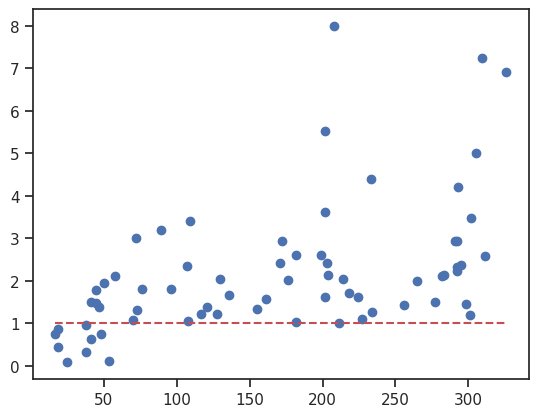

In [ ]:
plt.scatter(df['length'], df['polarization index'])
plt.plot(df['length'], [1.0 for i in range(df.shape[0])],'r--')

このグラフだけ見ても1.0付近に境界ラインを設定するのが良いと判断できる。    
実際に、**様々な境界ライン**で軸索かどうか判断して**分化率のヒストグラム**を作ってみると、境界ラインが1のときにちょうどよい形になることがわかる。

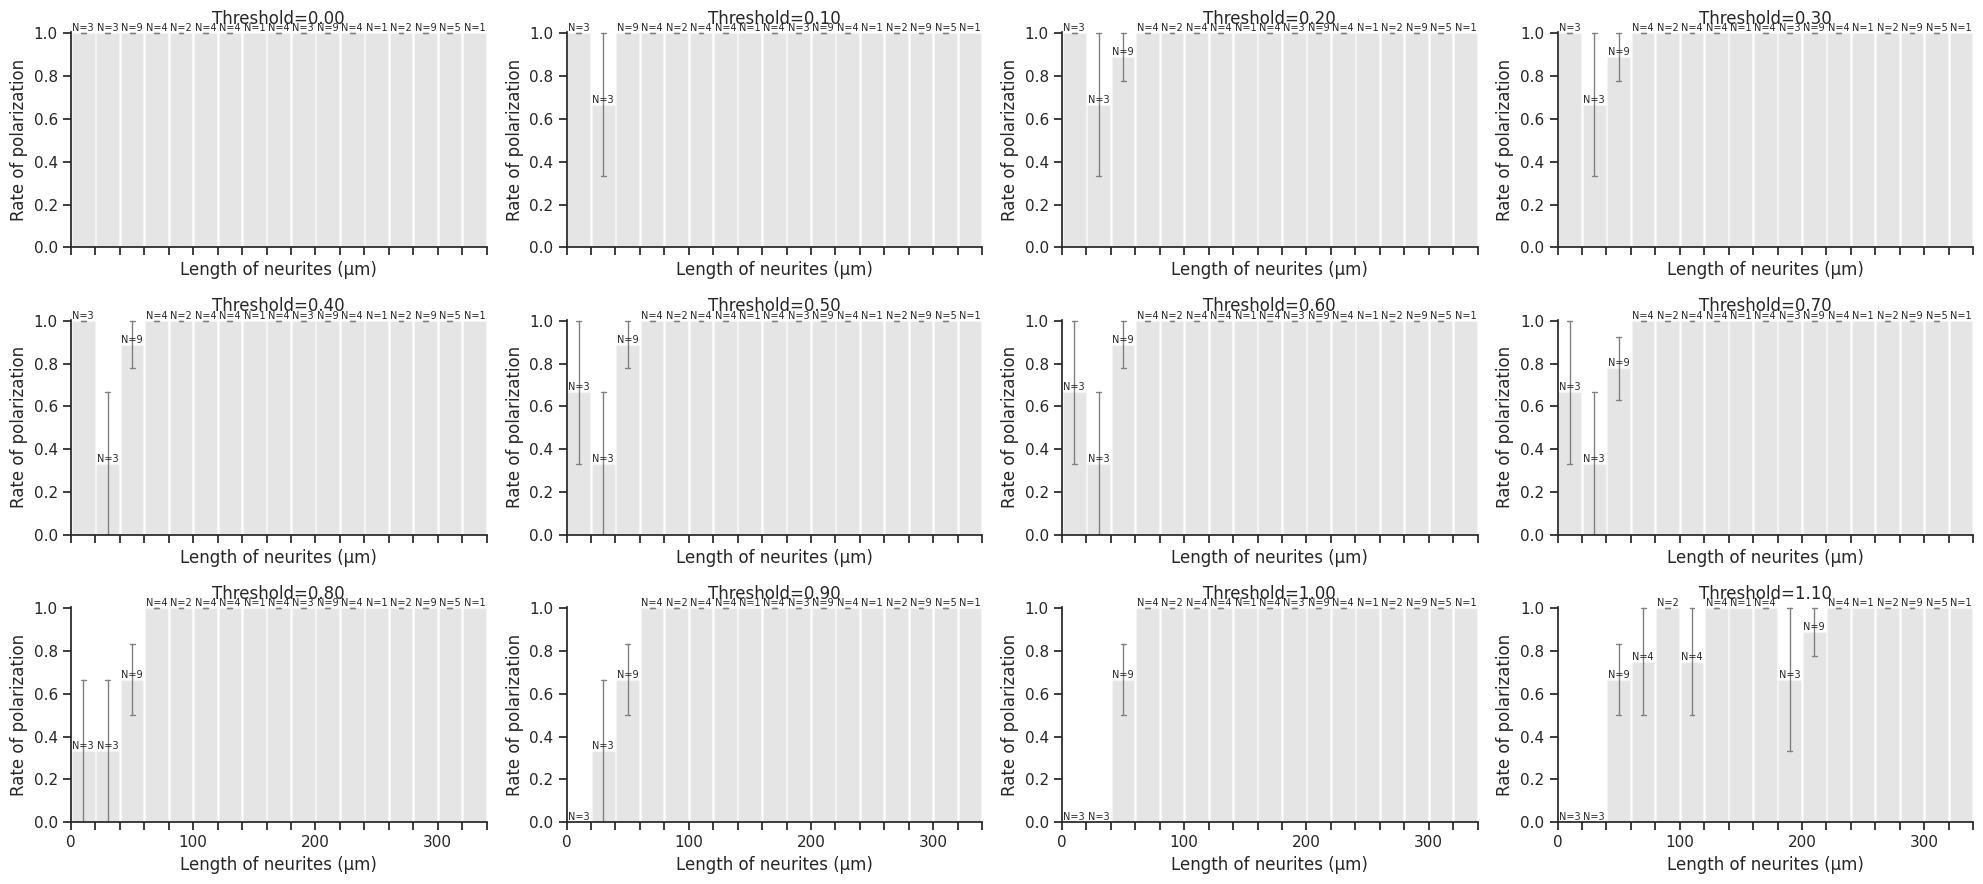

In [ ]:
n_row = 3
n_column = 4
fig, axes = plt.subplots(n_row, n_column, sharex=True, figsize=(5*n_column,3*n_row))
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')
thresholds = np.arange(0.0, 0.1*n_row*n_column-0.09, 0.1).reshape((n_row,n_column))

for i in range(n_row):
    for j in range(n_column):
        plot_hist(df, thresholds[i,j], axes[i,j])
        axes[i,j].set_title('Threshold={:.2f}'.format(thresholds[i,j]))

fig.tight_layout()
fig.savefig('high_resolution_plot.png', dpi=300)

0.80-1.10の範囲では比較的に形状が良さそうなので、その範囲を詳細に見て、より正確に理想的な形状となる境界ラインの範囲を洗い出す。

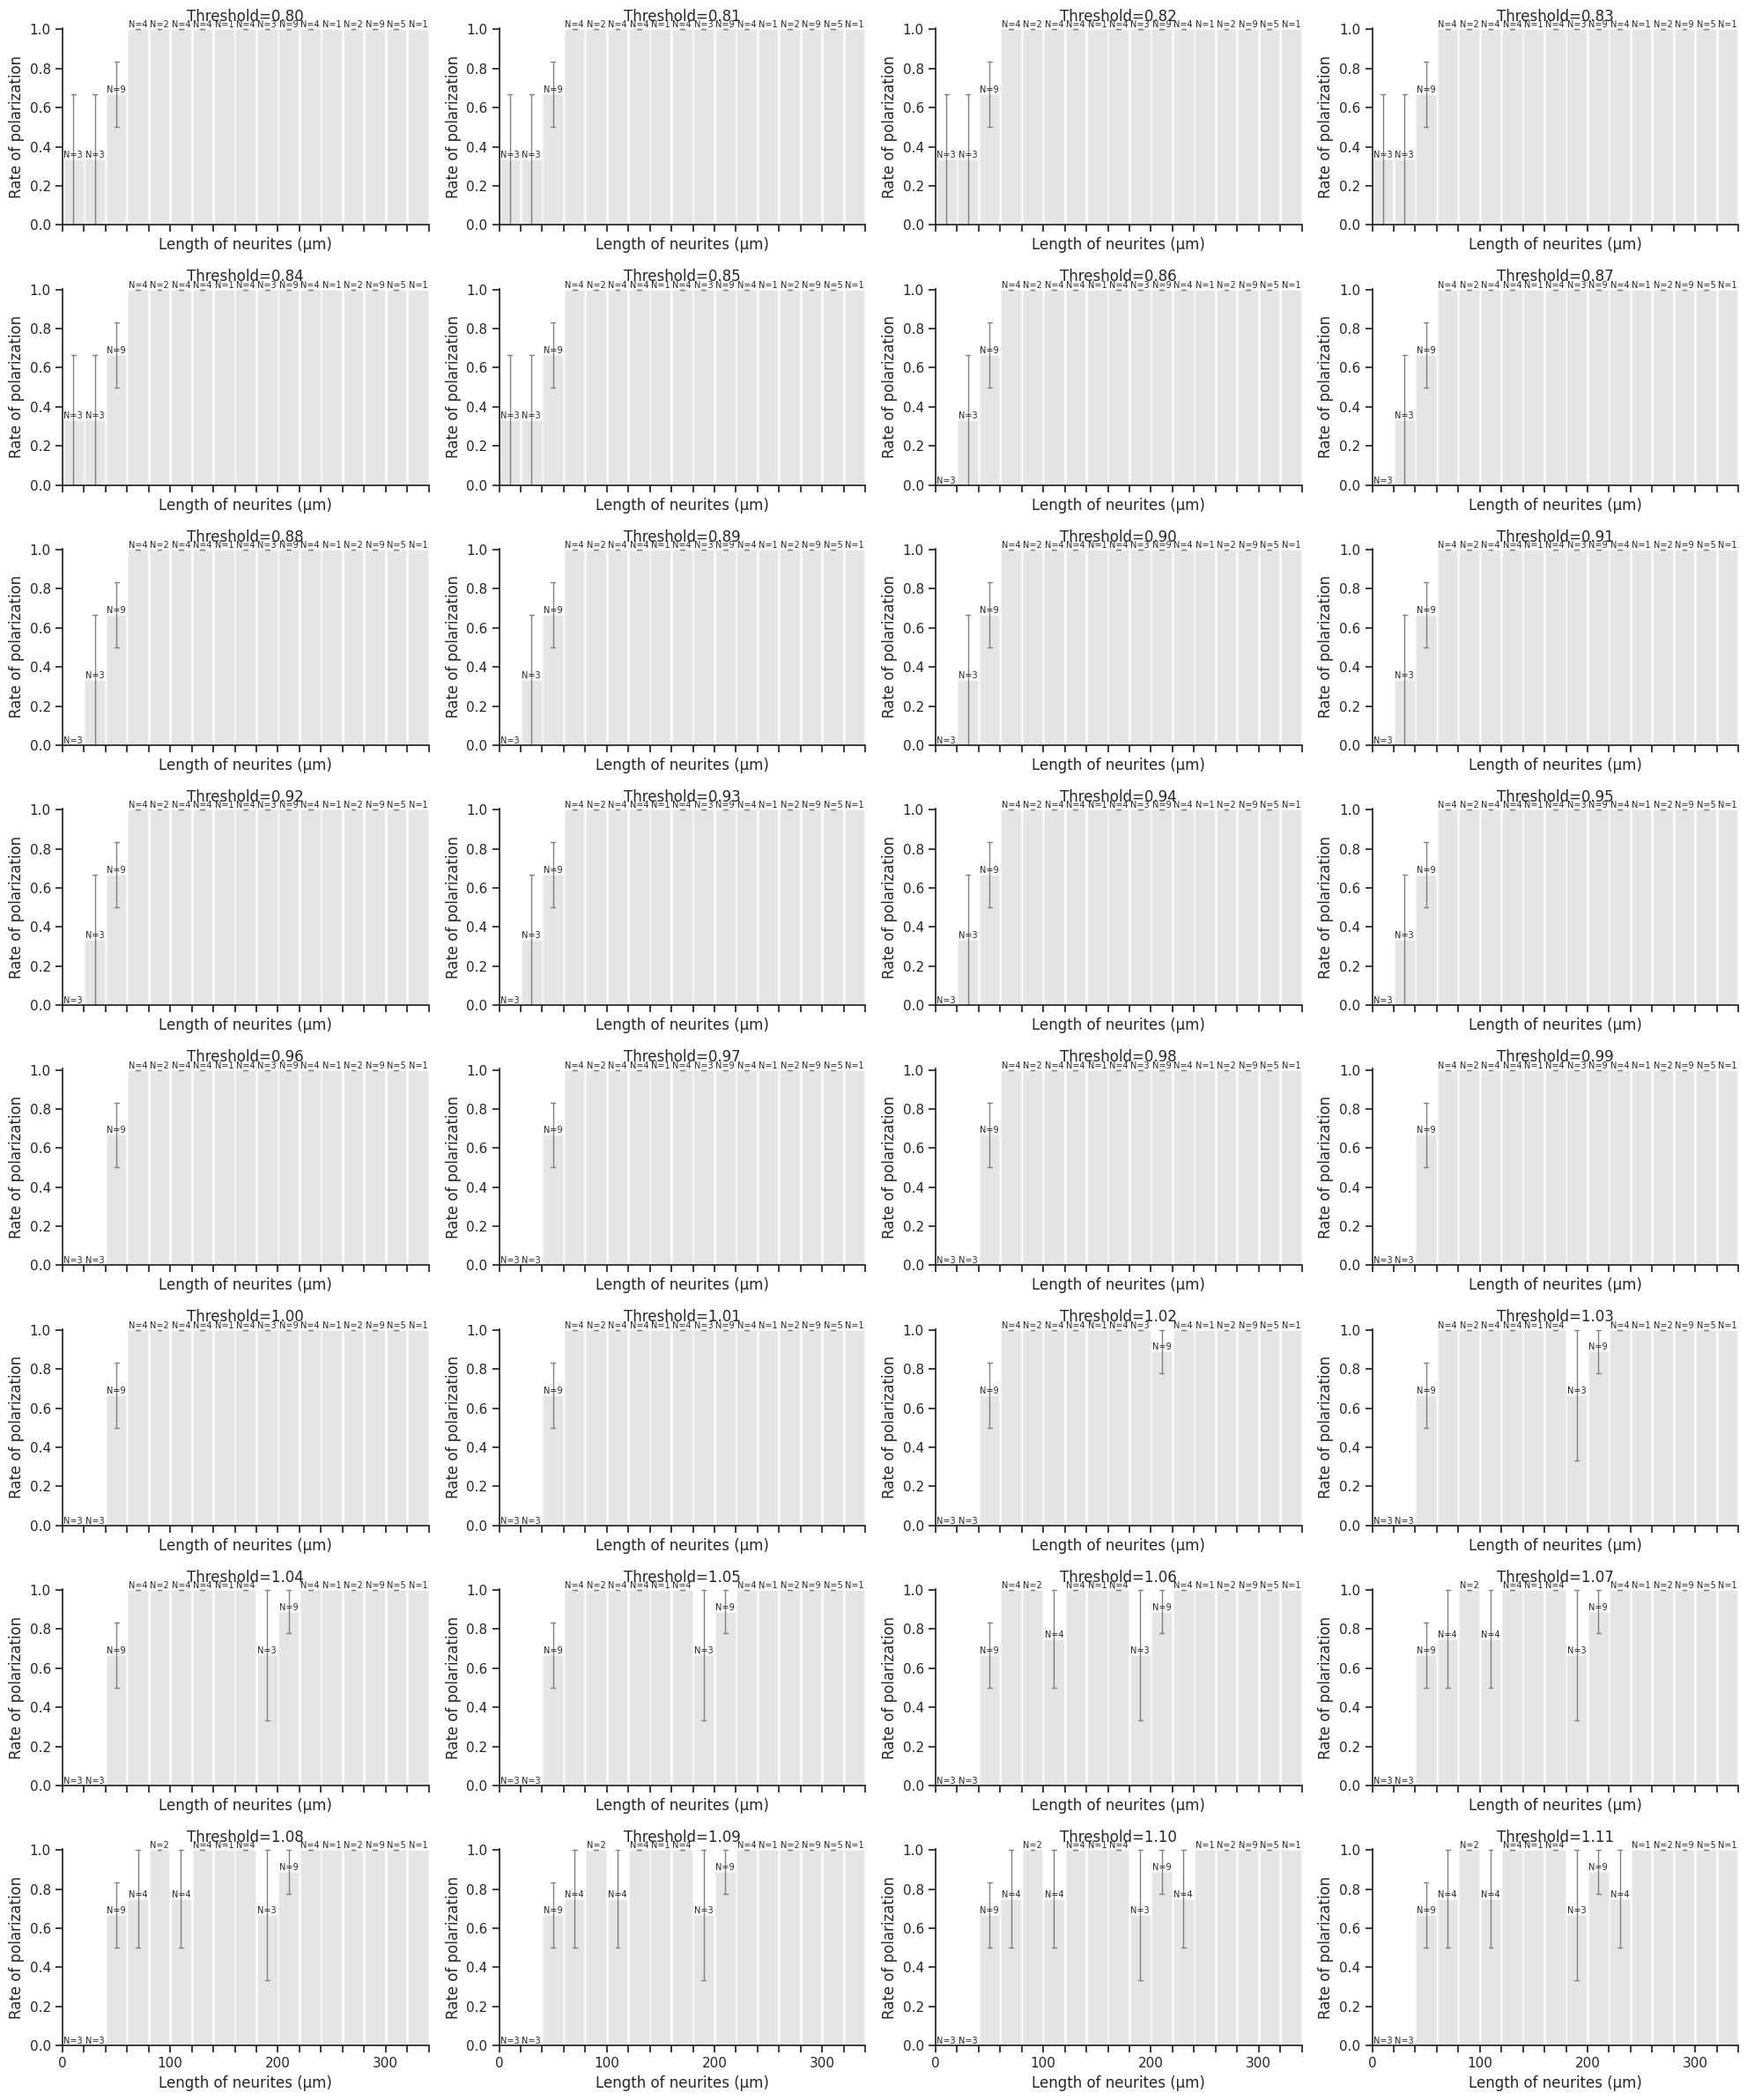

In [ ]:
n_row = 8
n_column = 4
fig, axes = plt.subplots(n_row, n_column, sharex=True, figsize=(5*n_column,3*n_row))
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')
thresholds = np.arange(0.8,0.8+n_row*n_column*0.01-0.005,0.01).reshape((n_row,n_column))

for i in range(n_row):
    for j in range(n_column):
        plot_hist(df, thresholds[i,j], axes[i,j])
        axes[i,j].set_title('Threshold={:.2f}'.format(thresholds[i,j]))

fig.tight_layout()
fig.savefig('high_resolution_plot.png', dpi=300)

したがって、境界ラインは`0.86-1.02`の範囲が良いと言える。

### 境界ラインに対する臨界長$L_c$、広がり$\sigma$、しきい値の変化

In [9]:
x_axis = np.arange(0,300, 1)

def func1(X, Lc, sigma):
    return 0.5*(np.tanh((X-Lc)/sigma)+1)

def fit(df, threshold):
    df1=pd.DataFrame({'is axon':df.apply(lambda x: int(x['polarization index']>=threshold), axis=1)})
    df = df.join(df1)
    X_data = np.array(df['length'])
    y_data = np.array(df['is axon'])
    popt, pcov = curve_fit(func1, X_data, y_data, p0=[50,20])
    return popt

In [35]:
thresholds = np.arange(0.86, 1.02, 0.001)

popts = np.array(np.zeros(len(thresholds)*2).reshape(len(thresholds),2))
for i,threshold in enumerate(thresholds):
    popt = fit(df, threshold)
    popts[i,:] = popt

In [11]:
print('臨界長Lcの幅：{:.2f}-{:.2f}\n広がりσの幅：{:.2f}-{:.2f}'.format(popts[:,0].min(),popts[:,0].max(),popts[:,1].min(),popts[:,1].max()))

臨界長Lcの幅：36.30-43.33
広がりσの幅：13.71-29.64


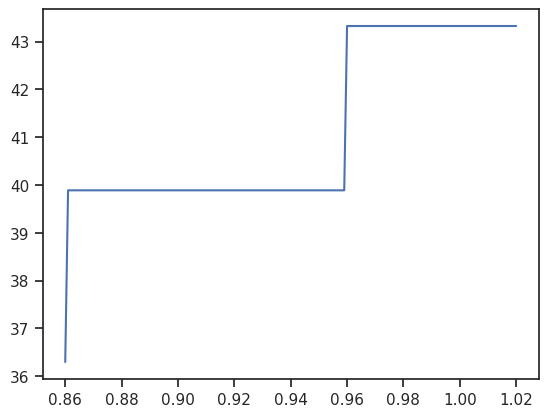

In [12]:
# 臨界長の変化
plt.plot(thresholds, popts[:,0])

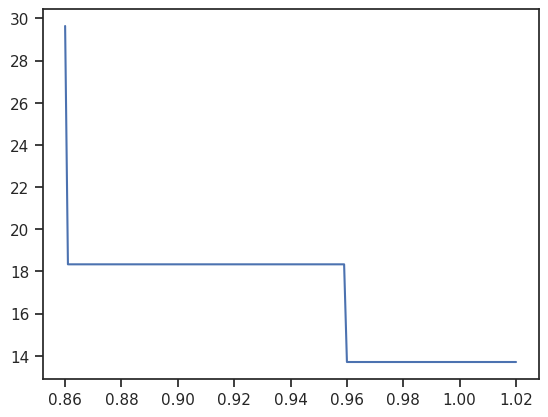

In [13]:
# 広がりσの変化
plt.plot(thresholds, popts[:,1])

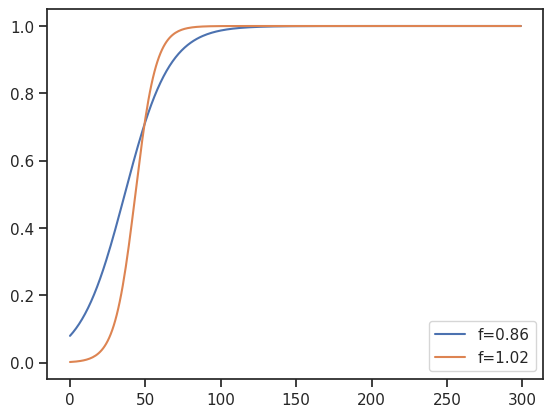

In [14]:
# 境界ラインが 0.86, 1.02 のときのグラフの比較
plt.plot(x_axis, func1(x_axis, popts[0,0], popts[0,1]), label='f=0.86')
plt.plot(x_axis, func1(x_axis, popts[-1,0], popts[-1,1]), label='f=1.02')
plt.legend()
plt.show()

In [36]:
# 各境界ラインに対するしきい値を求める
import sympy as sym

polarity_thresholds  = []
for Lc, sigma in zip(popts[:,0],popts[:,1]):
    l = sym.Symbol('l', real=True)
    f = sym.Eq(0.5*(sym.tanh((l-Lc)/sigma) +1),0.9995)
    solution = sym.solve(f,l,rational=False)
    polarity_thresholds.append(solution[0])

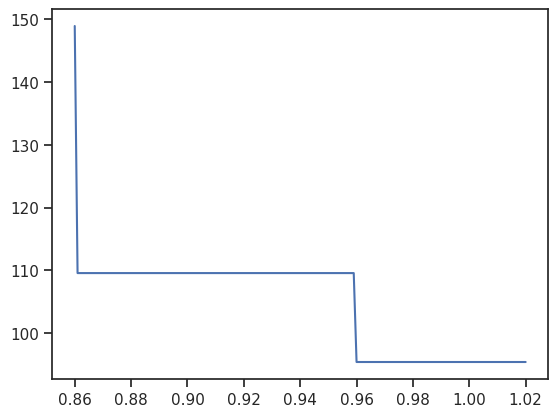

In [37]:
# 境界ラインに対するしきい値の変化
plt.plot(thresholds,polarity_thresholds)

In [40]:
print('しきい値の幅：{:.2f}-{:.2f}'.format(min(polarity_thresholds),max(polarity_thresholds)))

しきい値の幅：95.42-148.92
